<a href="https://colab.research.google.com/github/Saqib6611/Diabetes-Prediction-Tool-using-python-TKinter-library/blob/main/heartdeath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import io

In [99]:
set=pd.read_csv("heart.csv")
data=set.copy()

In [3]:
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns')

There are 299 rows and 13 columns


In [100]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [101]:
data.drop('time', inplace=True, axis=1)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [9]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
DEATH_EVENT                 0
dtype: int64

<Axes: >

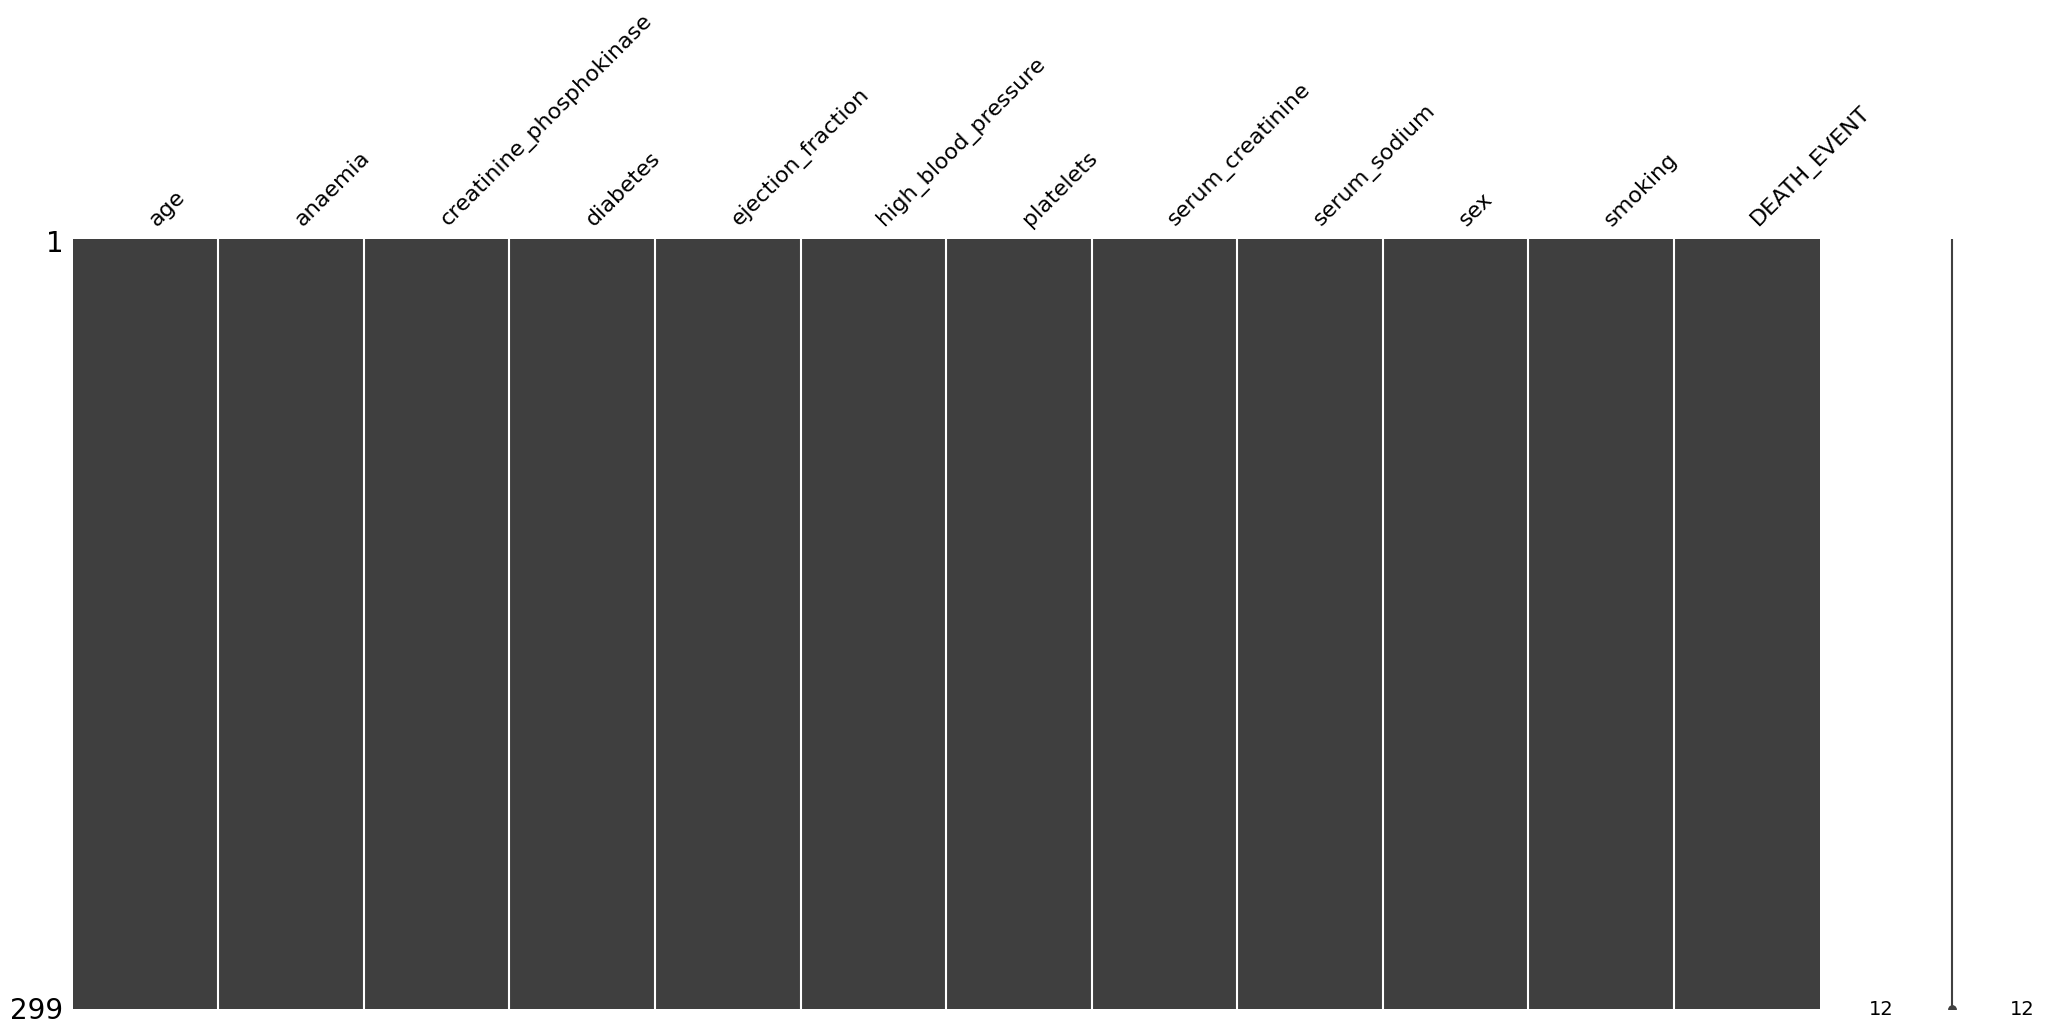

In [10]:
import missingno as msno
msno.matrix(data)

In [11]:
numerical= data.drop(['DEATH_EVENT'], axis=1).select_dtypes('number').columns

categorical = data.select_dtypes('object').columns

print(f'Numerical Columns:  {data[numerical].columns}')
print('\n')
print(f'Categorical Columns: {data[categorical].columns}')

Numerical Columns:  Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking'],
      dtype='object')


Categorical Columns: Index([], dtype='object')


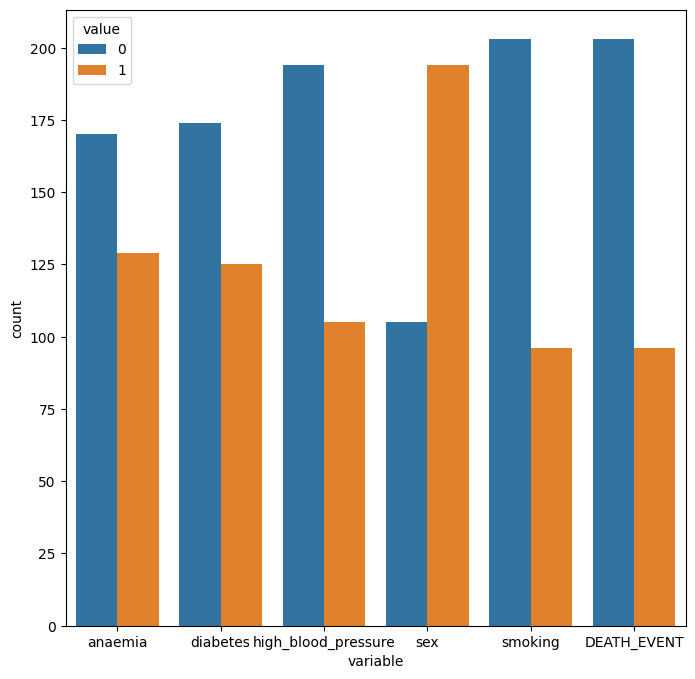

In [12]:
plt.figure(figsize=(8,8))
df_categorical = data.loc[:,['anaemia','diabetes', 'high_blood_pressure', 'sex', 'smoking','DEATH_EVENT']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical));

In [14]:
import plotly.graph_objs as go
male = data[data["sex"]==1]
female = data[data["sex"]==0]

male_survi = male[data["DEATH_EVENT"]==0]
male_not = male[data["DEATH_EVENT"]==1]
female_survi = female[data["DEATH_EVENT"]==0]
female_not = female[data["DEATH_EVENT"]==1]

labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]
values = [len(male[data["DEATH_EVENT"]==0]),len(male[data["DEATH_EVENT"]==1]),
         len(female[data["DEATH_EVENT"]==0]),len(female[data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(
    title_text="Analysis on Survival - Gender")
fig.show()

In [15]:
import plotly.graph_objs as go
diabetic = data[data["diabetes"]==1]
non_diabetic = data[data["diabetes"]==0]

male_survi = diabetic[data["DEATH_EVENT"]==0]
male_not = diabetic[data["DEATH_EVENT"]==1]
female_survi = non_diabetic[data["DEATH_EVENT"]==0]
female_not = non_diabetic[data["DEATH_EVENT"]==1]

labels = ['Diabetic - Survived','Diabetic - Not Survived', "Non_Diabetic -  Survived", "Non_Diabetic - Not Survived"]
values = [len(diabetic[data["DEATH_EVENT"]==0]),len(diabetic[data["DEATH_EVENT"]==1]),
         len(non_diabetic[data["DEATH_EVENT"]==0]),len(non_diabetic[data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Diabetes")

In [17]:
anaemia_yes = data[data['anaemia']==1]
anaemia_no = data[data['anaemia']==0]
anaemia_yes_survi = anaemia_yes[data["DEATH_EVENT"]==0]
anaemia_yes_not_survi = anaemia_yes[data["DEATH_EVENT"]==1]
anaemia_no_survi = anaemia_no[data["DEATH_EVENT"]==0]
anaemia_no_not_survi = anaemia_no[data["DEATH_EVENT"]==1]

labels = ['Anaemia Yes - Survived','Anaemia Yes - Not Survived', 'Anaemia No - Survived', 'Anaemia NO - Not Survived']
values = [len(anaemia_yes[data["DEATH_EVENT"]==0]),len(anaemia_yes[data["DEATH_EVENT"]==1]),
         len(anaemia_no[data["DEATH_EVENT"]==0]),len(anaemia_no[data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Anaemia")
fig.show()

In [18]:
hbp_yes = data[data['high_blood_pressure']==1]
hbp_no = data[data['high_blood_pressure']==0]
hbp_yes_survi = hbp_yes[data["DEATH_EVENT"]==0]
hbp_yes_not_survi = hbp_yes[data["DEATH_EVENT"]==1]
hbp_no_survi = hbp_no[data["DEATH_EVENT"]==0]
hbp_no_not_survi = hbp_no[data["DEATH_EVENT"]==1]

labels = ['HBP Yes - Survived','HBP Yes - Not Survived', 'HBP No - Survived', 'HBP NO - Not Survived']
values = [len(hbp_yes[data["DEATH_EVENT"]==0]),len(hbp_yes[data["DEATH_EVENT"]==1]),
         len(hbp_no[data["DEATH_EVENT"]==0]),len(hbp_no[data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.2)])
fig.update_layout(
    title_text="Analysis on Survival - HBP(high blood pressure)")
fig.show()


In [19]:
smoking_yes = data[data['smoking']==1]
smoking_no = data[data['smoking']==0]
smoking_yes_survi = smoking_yes[data["DEATH_EVENT"]==0]
smoking_yes_not_survi = smoking_yes[data["DEATH_EVENT"]==1]
smoking_no_survi = smoking_no[data["DEATH_EVENT"]==0]
smoking_no_not_survi = smoking_no[data["DEATH_EVENT"]==1]

labels = ['Smoking Yes - Survived','Smoking Yes - Not Survived', 'Smoking No - Survived', 'Smoking NO- Not Survived']
values = [len(smoking_yes[data["DEATH_EVENT"]==0]),len(smoking_yes[data["DEATH_EVENT"]==1]),
         len(smoking_no[data["DEATH_EVENT"]==0]),len(smoking_no[data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Smoking")
fig.show()

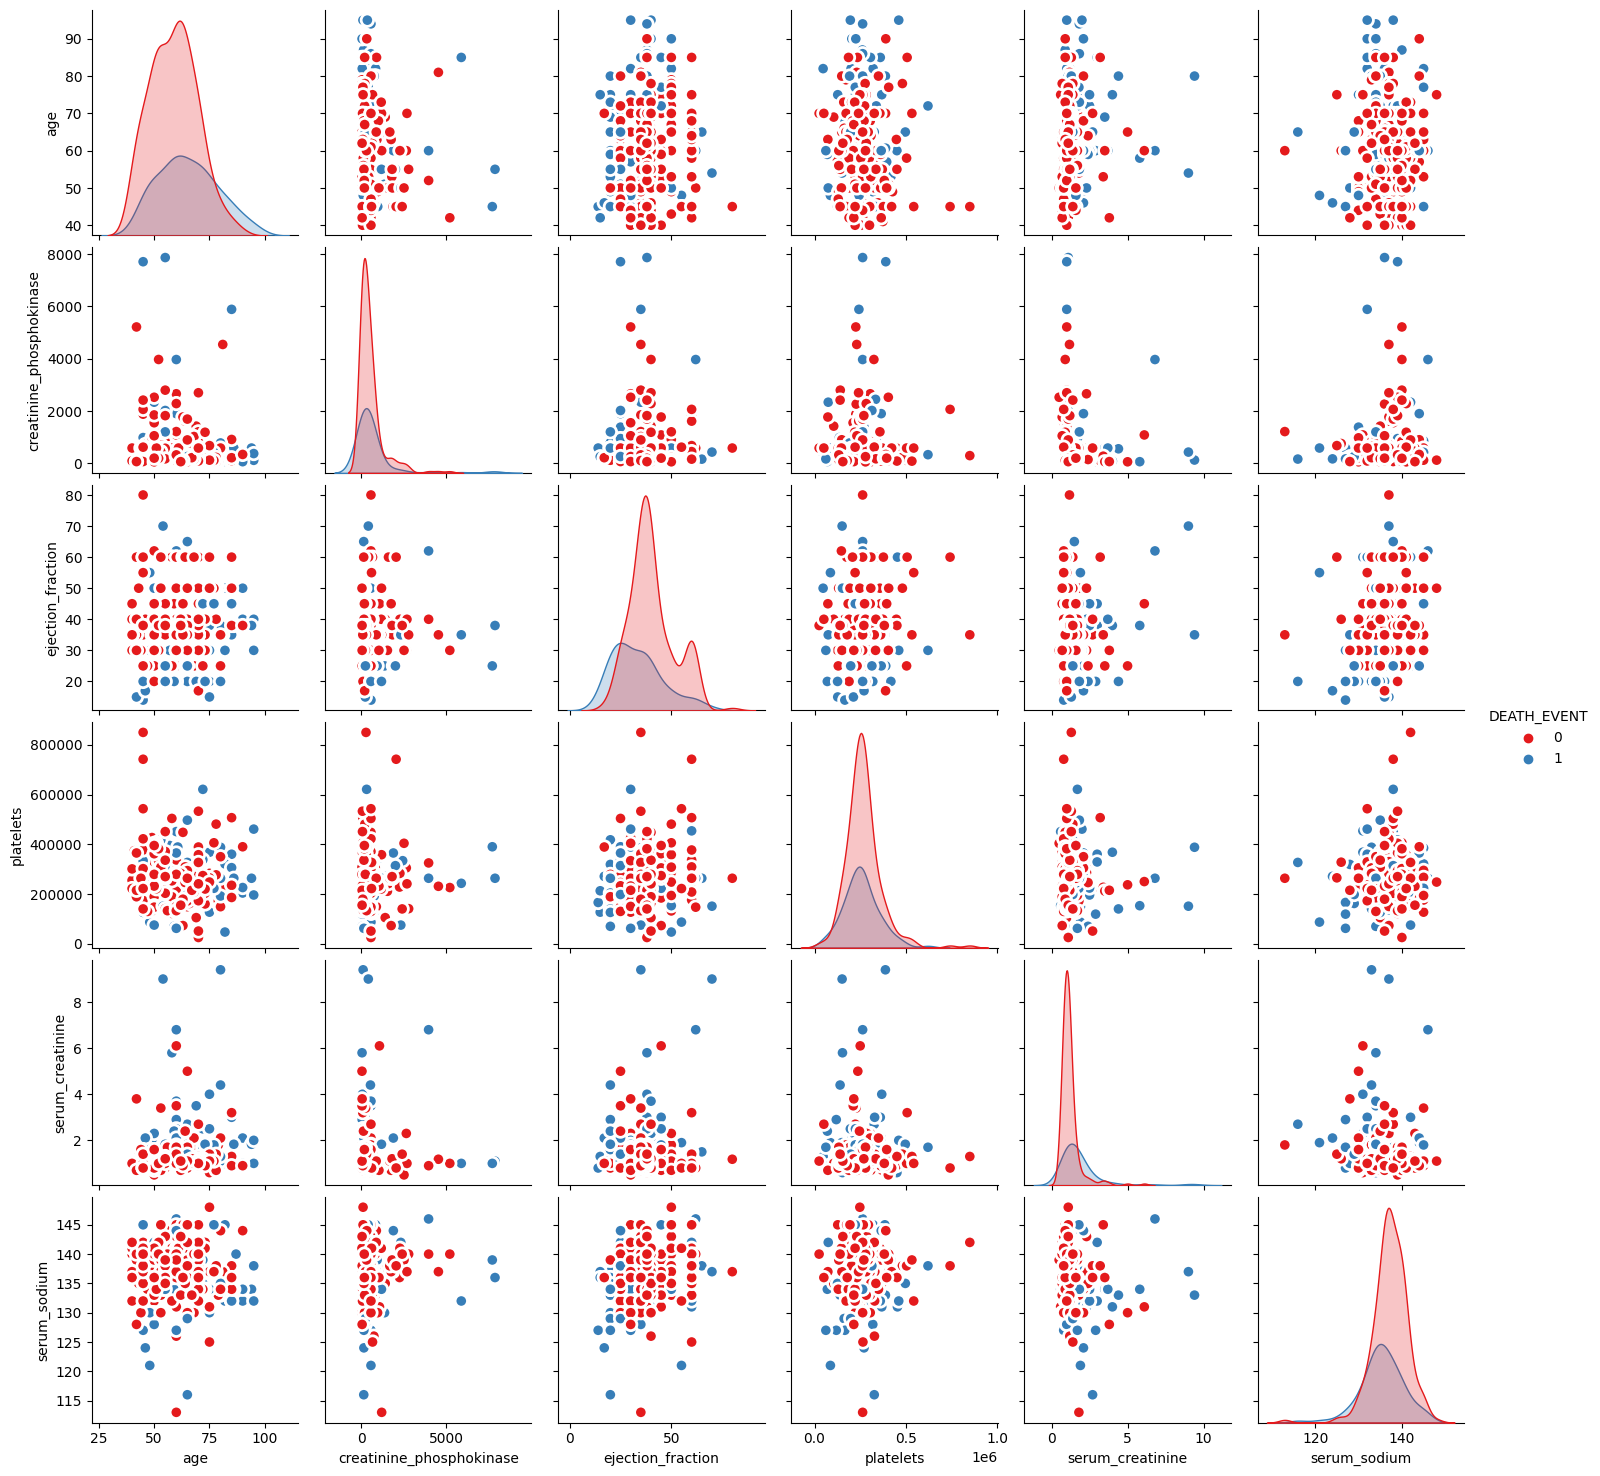

In [28]:
continuous = data.loc[:,['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','DEATH_EVENT']]
sns.pairplot(continuous, kind="scatter", hue="DEATH_EVENT",palette="Set1", plot_kws=dict(s=80, edgecolor="white", linewidth=2))
plt.show()

# parallel coordinates of continuous attributes

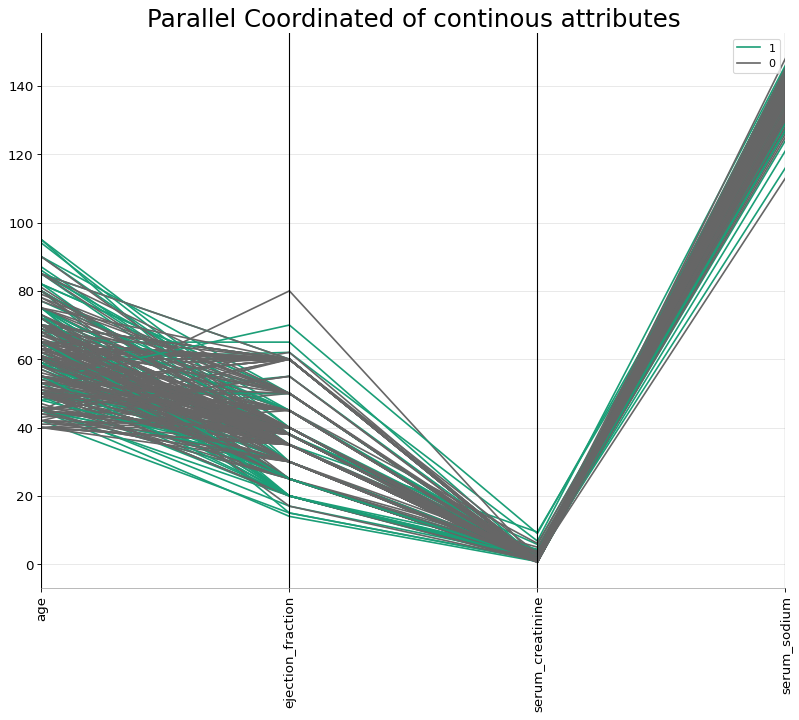

In [29]:
continuous2 = data.loc[:,['age','ejection_fraction','serum_creatinine','serum_sodium','DEATH_EVENT']]
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(12,9), dpi= 80)
parallel_coordinates(continuous2, 'DEATH_EVENT', colormap='Dark2')
plt.xticks(rotation=90)


# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Parallel Coordinated of continous attributes', fontsize=22)
plt.grid(alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

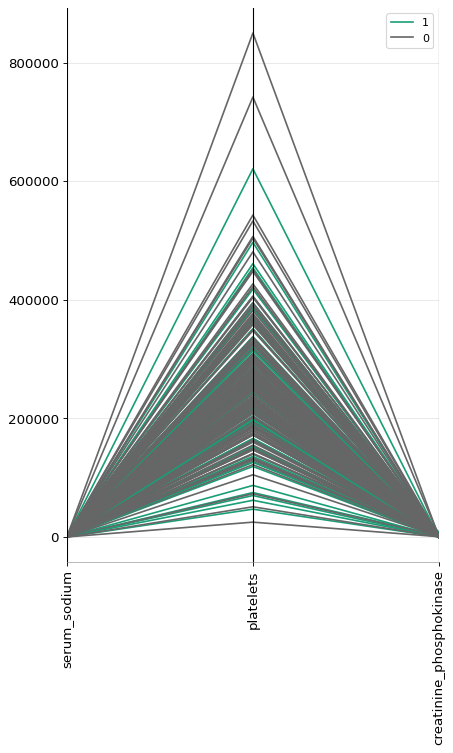

In [30]:
continuous3 = data.loc[:,['serum_sodium','platelets','creatinine_phosphokinase','DEATH_EVENT']]
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(6,9), dpi= 80)
parallel_coordinates(continuous3, 'DEATH_EVENT', colormap='Dark2')
plt.xticks(rotation=90)


# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

#plt.title('Parallel Coordinated of', fontsize=22)
plt.grid(alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [31]:
data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


<Axes: >

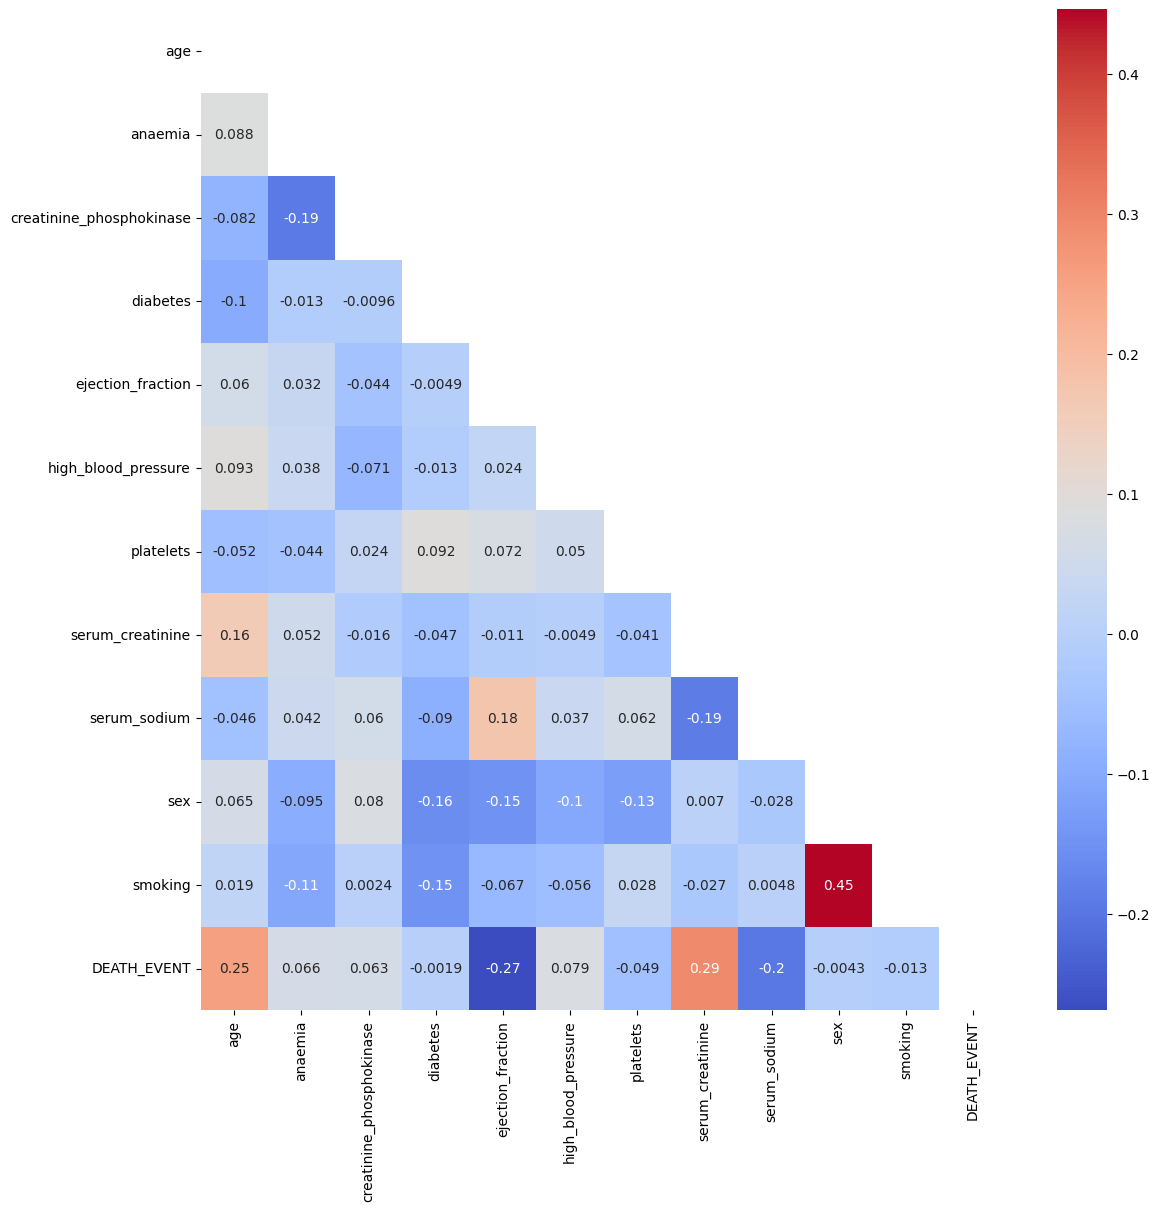

In [32]:
plt.figure(figsize=(13,13))
matrix=np.triu(data.corr(),k=0)
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',mask=matrix)

Text(0.5, 1.0, 'Ratio of Deaths')

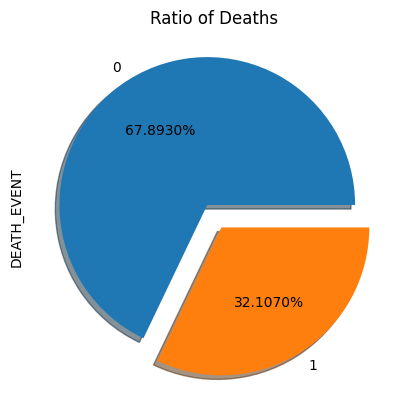

In [33]:
data['DEATH_EVENT'].value_counts().plot.pie(explode=[0.09,0.09],autopct='%2.4f%%',shadow=True)
plt.title('Ratio of Deaths')

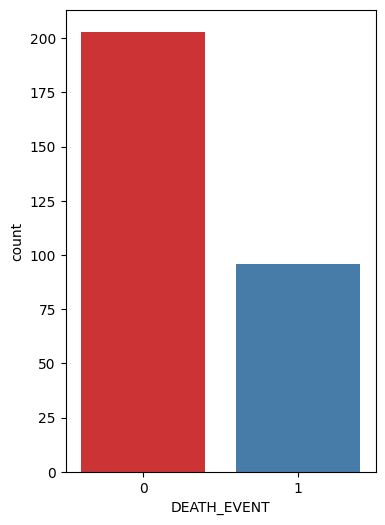

In [35]:
ax=plt.subplots(figsize=(4,6))
ax=sns.countplot(x="DEATH_EVENT",data=data,palette="Set1")
plt.show()

In [102]:
zero  = data[data['DEATH_EVENT']==0]
one = data[data['DEATH_EVENT']==1]

from sklearn.utils import resample
data_minority_upsampled = resample(one, replace = True, n_samples = 200)
data = pd.concat([zero, data_minority_upsampled])

from sklearn.utils import shuffle
data = shuffle(data)

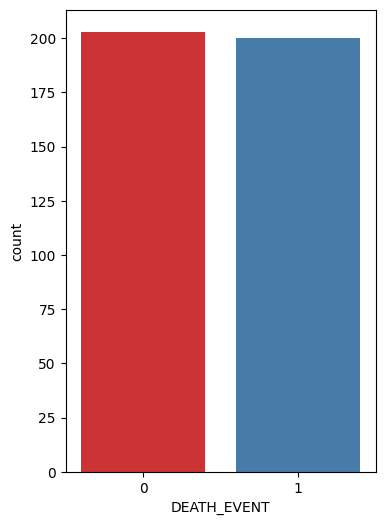

In [37]:
ax=plt.subplots(figsize=(4,6))
ax=sns.countplot(x="DEATH_EVENT",data=data,palette="Set1")
plt.show()

In [103]:
data.reset_index(inplace=True)
data.drop('index', inplace=True, axis=1)

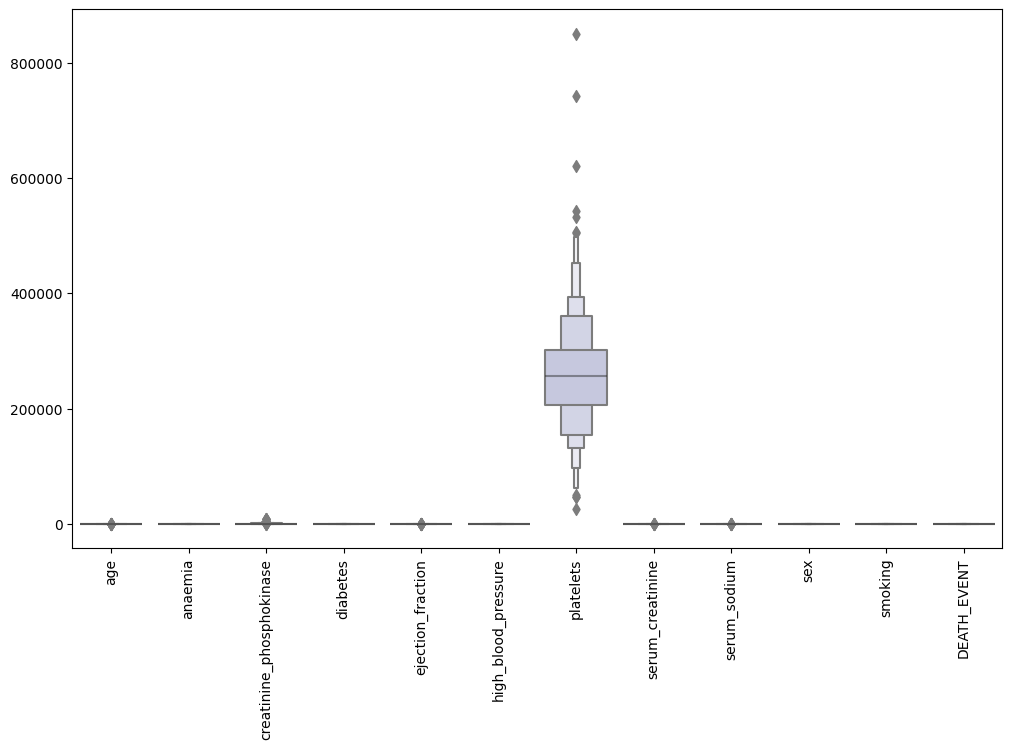

In [39]:
#Detecting outliers
#looking at the scaled features
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(12,7))
sns.boxenplot(data = data,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [104]:
#removing outliers
from scipy import stats
print('shape before removing outliers',data.shape)
data=data[(np.abs(stats.zscore(data))<3).all(axis=1)]
print('shape after removing outliers',data.shape)

shape before removing outliers (403, 12)
shape after removing outliers (380, 12)


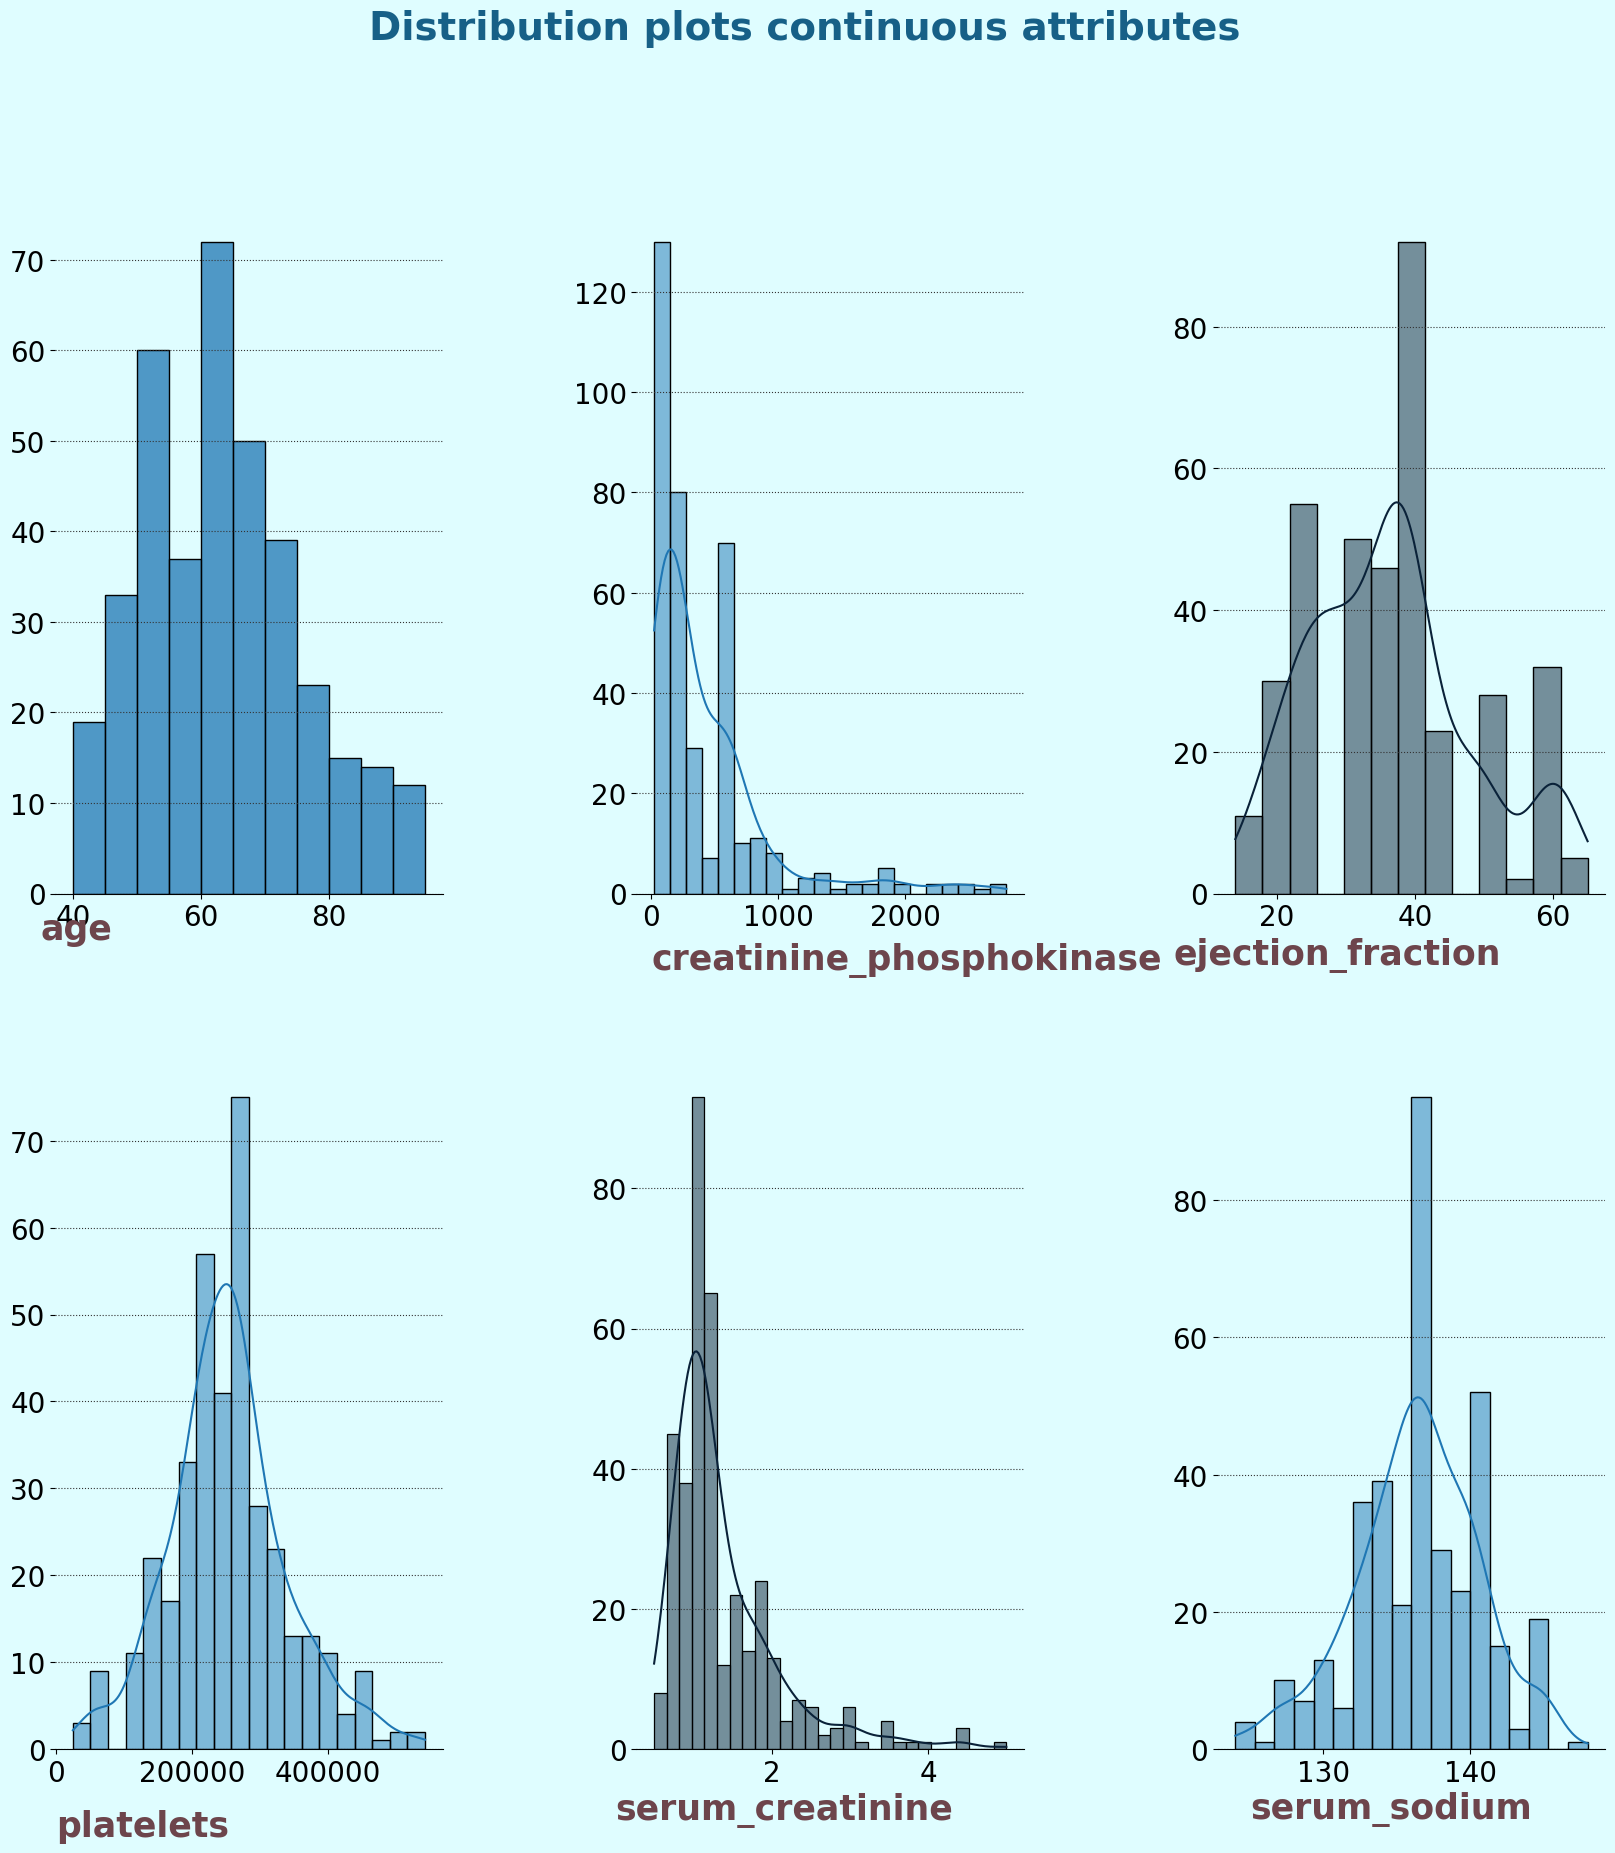

In [41]:
colors= ['#0A2239' ,'#53A2BE' ,'#1D84B5' ,'#132E32' ,'#176087']
fig = plt.figure(figsize=(20,20))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])


background_color = "#DFFDFF"
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)


ax0.text(35,-5, 'age', fontsize=25, color='#6D454C', weight='bold')
ax0.grid(axis='y', color="#333", linestyle=':')
ax0.tick_params(axis='both', which='both', labelsize=20)
sns.histplot(x='age', data=data, palette=colors, ax=ax0, edgecolor="black").set(xlabel="", ylabel="")

ax1.text(0,-15, 'creatinine_phosphokinase', fontsize=25, color='#6D454C', weight='bold')
ax1.grid(axis='y', color="#333", linestyle=':')
ax1.tick_params(axis='both', which='both', labelsize=20)
sns.histplot(x='creatinine_phosphokinase', data=data, palette=colors, ax=ax1, edgecolor="black", kde=True).set(xlabel="", ylabel="")

ax2.text(5,-10, 'ejection_fraction', fontsize=25, color='#6D454C', weight='bold')
ax2.grid(axis='y', color="#333", linestyle=':')
ax2.tick_params(axis='both', which='major', labelsize=20)
sns.histplot(x='ejection_fraction', data=data, color='#0A2239', ax=ax2, edgecolor="black", kde=True).set(xlabel="", ylabel="")

ax3.text(0, -10, 'platelets', fontsize=25, color='#6D454C', weight='bold')
ax3.grid(axis='y', color="#333", linestyle=':')
ax3.tick_params(axis='both', which='major', labelsize=20)
sns.histplot(x='platelets', data=data, palette=colors, ax=ax3, edgecolor="black", kde=True).set(xlabel="", ylabel="")

ax4.text(0, -10, 'serum_creatinine', fontsize=25, color='#6D454C', weight='bold')
ax4.grid(axis='y', color="#333", linestyle=':')
ax4.tick_params(axis='both', which='major', labelsize=20)
sns.histplot(x='serum_creatinine', data=data, color='#0A2239', ax=ax4, edgecolor="black", kde=True).set(xlabel="", ylabel="")

ax5.text(125, -10 , 'serum_sodium', fontsize=25, color='#6D454C', weight='bold')
ax5.grid(axis='y', color="#333", linestyle=':')
ax5.tick_params(axis='both', which='major', labelsize=20)
sns.histplot(x='serum_sodium', data=data, ax=ax5, edgecolor="black", kde=True).set(xlabel="", ylabel="")



fig.suptitle('Distribution plots continuous attributes', fontsize="28", weight="bold", color="#176087")


for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

<Axes: >

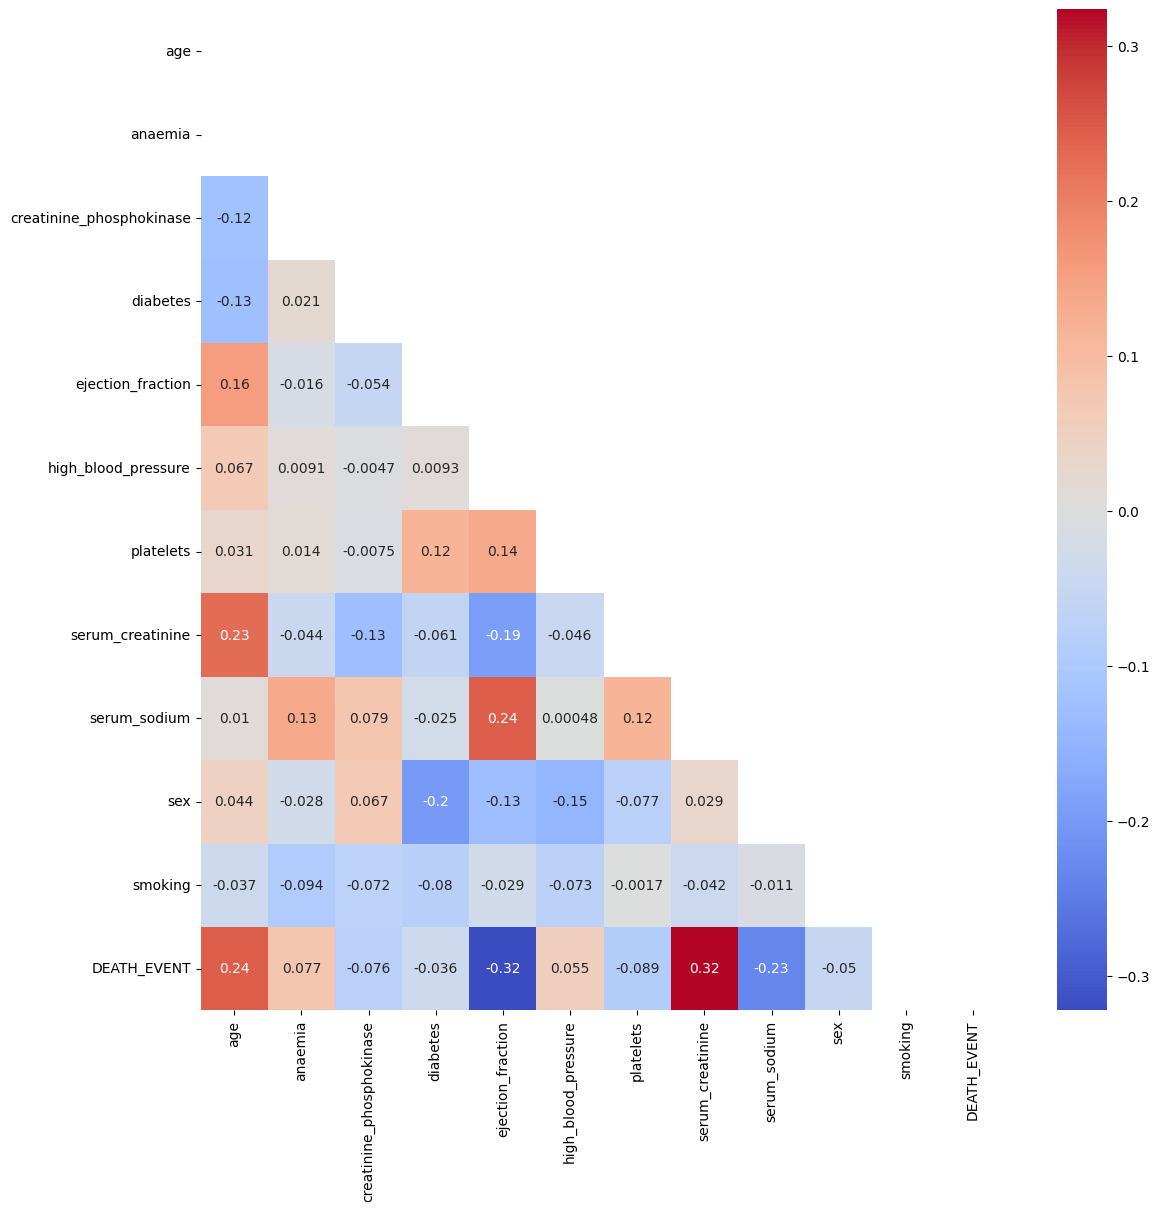

In [42]:
plt.figure(figsize=(13,13))
matrix=np.triu(data.corr(),k=-1)
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',mask=matrix)

In [162]:
x = data.drop(["DEATH_EVENT"], axis=1)
y = data["DEATH_EVENT"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape,x_test.shape)

(304, 11) (76, 11)


In [163]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth=9,random_state=42,criterion='entropy')
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=42)

In [164]:
pred1=dtree.predict(x_test)
print("classification report is:\n",classification_report(y_test,pred1))
print("Confusion matrix:\n",confusion_matrix(y_test,pred1))

classification report is:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83        43
           1       0.78      0.76      0.77        33

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76

Confusion matrix:
 [[36  7]
 [ 8 25]]


In [165]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
pred2=knn.predict(x_test)

In [166]:
print("classification report is::\n",classification_report(y_test,pred2))
print("confusion matrix:\n",confusion_matrix(y_test,knn.predict(x_test)))

classification report is::
               precision    recall  f1-score   support

           0       0.69      0.47      0.56        43
           1       0.51      0.73      0.60        33

    accuracy                           0.58        76
   macro avg       0.60      0.60      0.58        76
weighted avg       0.61      0.58      0.57        76

confusion matrix:
 [[20 23]
 [ 9 24]]


In [184]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42, n_estimators=10, max_depth= 11, criterion = 'gini')
model.fit(x_train,y_train) #fitting the model
pred3 = model.predict(x_test) #prediction

In [168]:
print("classifiaction report:\n",classification_report(y_test, pred3))
print("confusion_matrix:\n",confusion_matrix(y_test, pred3))

classifiaction report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88        43
           1       0.81      0.91      0.86        33

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76

confusion_matrix:
 [[36  7]
 [ 3 30]]


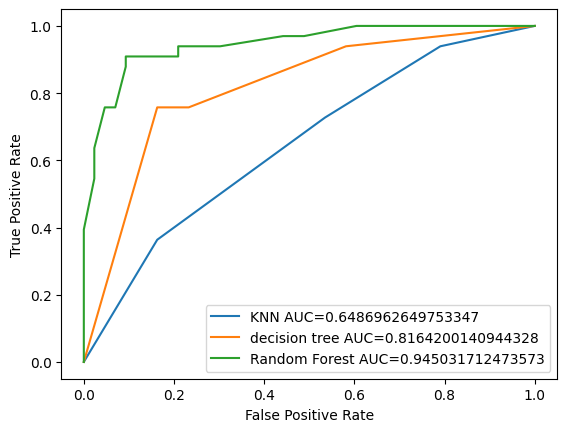

In [169]:
# Decision Tree ROC and AUC
y_pred_proba = dtree.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
# KNN ROC and AUC
y_pred_proba1 = knn.predict_proba(x_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba1)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba1)
# Random Forest ROC and AUC
y_pred_proba2 = model.predict_proba(x_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba2)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba2)

#create ROC curve
plt.plot(fpr1,tpr1,label="KNN AUC="+str(auc1))
plt.plot(fpr,tpr,label="decision tree AUC="+str(auc))
plt.plot(fpr2,tpr2,label="Random Forest AUC="+str(auc2))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [170]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1_train = sc.fit_transform(x_train)
x1_test = sc.fit_transform(x_test)

In [171]:
knn1=KNeighborsClassifier(n_neighbors=3)
knn1.fit(x1_train,y_train)
pred4=knn1.predict(x1_test)

In [172]:
print("classification report is::\n",classification_report(y_test,pred4))
print("confusion matrix:\n",confusion_matrix(y_test,pred4))

classification report is::
               precision    recall  f1-score   support

           0       0.80      0.81      0.80        43
           1       0.75      0.73      0.74        33

    accuracy                           0.78        76
   macro avg       0.77      0.77      0.77        76
weighted avg       0.78      0.78      0.78        76

confusion matrix:
 [[35  8]
 [ 9 24]]


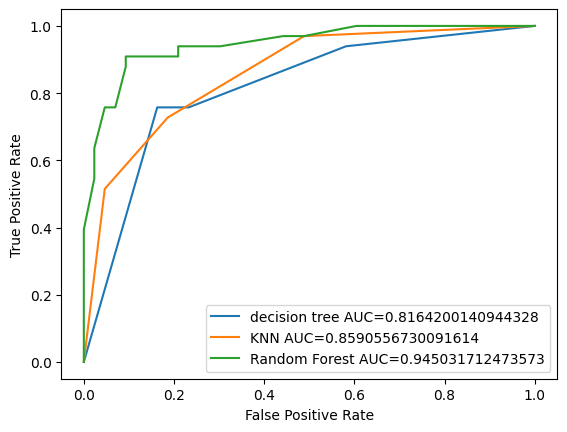

In [174]:
# Decision Tree ROC and AUC
y_pred_proba3 = dtree.predict_proba(x_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba3)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba3)
# KNN ROC and AUC
y_pred_proba4 = knn1.predict_proba(x1_test)[::,1]
fpr4, tpr4, _ = metrics.roc_curve(y_test,  y_pred_proba4)
auc4 = metrics.roc_auc_score(y_test, y_pred_proba4)
# Random Forest ROC and AUC
y_pred_proba5 = model.predict_proba(x_test)[::,1]
fpr5, tpr5, _ = metrics.roc_curve(y_test,  y_pred_proba5)
auc5 = metrics.roc_auc_score(y_test, y_pred_proba5)

#create ROC curve
plt.plot(fpr3,tpr3,label="decision tree AUC="+str(auc3))
plt.plot(fpr4,tpr4,label="KNN AUC="+str(auc4))
plt.plot(fpr5,tpr5,label="Random Forest AUC="+str(auc5))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [175]:
dcc=100*accuracy_score(y_test,pred1)
knnc=100*accuracy_score(y_test,pred2)
upknnc=100*accuracy_score(y_test,pred4)

In [178]:
models=['KNN','Decision Tree','Random Forest']
scores=[upknnc,dcc,rf]

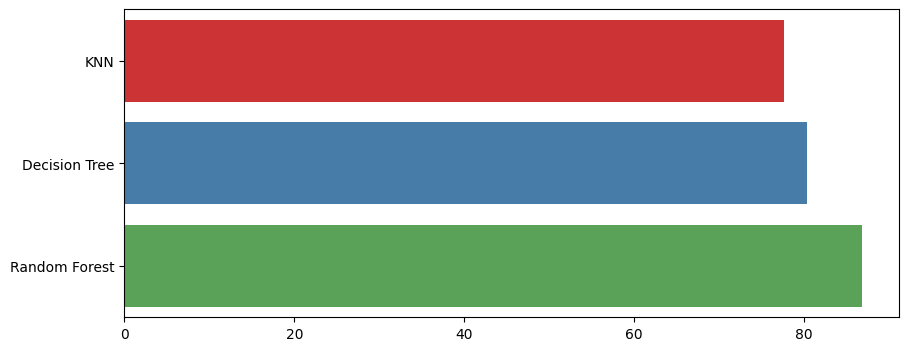

In [179]:
plt.figure(figsize=(10,4))
sns.barplot(x=scores,y=models,palette='Set1')
plt.show()

In [183]:
scores1=[upknnc,dcc,rf]
score_table=pd.DataFrame({'model':models,'Accuracy %':scores1})
score_table.sort_values(by='Accuracy %',axis=0,ascending=False)
score_table.style.background_gradient(cmap='Blues_r')

,model,Accuracy %
0,KNN,77.631579
1,Decision Tree,80.263158
2,Random Forest,86.842105
